In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from funcs import plot_corr

In [2]:
plt.style.use("ggplot")
%load_ext autoreload
%autoreload 2

In [3]:
df_mat = pd.read_csv("../Data/student-mat.csv", delimiter=";")
df_por = pd.read_csv("../Data/student-por.csv", delimiter=";")

In [4]:
df= df_mat.merge(df_por, on=["school","sex","age","address","famsize","Pstatus","Medu",
                                     "Fedu","Mjob","Fjob","reason","nursery","internet"])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df = df[[c for c in df if c not in ['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y']] 
       + ['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y']]
df.rename(columns={'G1_x': 'G1_mat', 'G2_x': 'G2_mat', 'G3_x': 'G3_mat', 'G1_y': 'G1_por', 'G2_y': 'G2_por', 'G3_y': 'G3_por'}, inplace=True)

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc_y,Walc_y,health_y,absences_y,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,7,9,8,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,2,2,5,3,6,5,0,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,6,5,0,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,14,16,16,10,10,10


In [7]:
drop = []
rename = []
for name in df.columns:
    if name[-2:] == "_x":
        drop.append(name)
    elif name[-2:] == "_y":
         df.rename(columns={name:name[:-2]}, inplace=True)
df.drop(columns=drop, inplace=True)

## Our final variables
Now we just gotta make them into numbers

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,7,9,8,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,2,2,5,3,6,5,0,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,6,5,0,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,14,16,16,10,10,10


In [9]:
display(df.isnull().sum()) #Det er ingen manglende verdier

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
nursery       0
internet      0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
higher        0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_mat        0
G2_mat        0
G3_mat        0
G1_por        0
G2_por        0
G3_por        0
dtype: int64

In [10]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
nursery       object
internet      object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
higher        object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1_mat         int64
G2_mat         int64
G3_mat         int64
G1_por         int64
G2_por         int64
G3_por         int64
dtype: object

In [11]:
df_numeric = df.copy()

In [12]:
to_one_hot = ["Mjob", "Fjob", "reason", "guardian"]

In [13]:
for col in to_one_hot:
    df_numeric[col] = df_numeric[col].astype("category")
    categories = df_numeric[col].cat.categories
    df_numeric = pd.get_dummies(df_numeric, columns=[col], prefix=[col], prefix_sep='_')

In [14]:
replace_map = {"sex": {"F":1, "M":0}, "school": {"GP":1, "MS":0}, "address":{"U":1, "R":0}, "famsize":{"GT3":1, "LE3":0},
              "schoolsup":{"yes":1, "no":0}, "famsup":{"yes":1, "no":0}, "paid":{"yes":1, "no":0},
              "activities":{"yes":1, "no":0}, "nursery":{"yes":1, "no":0},"higher":{"yes":1, "no":0},"internet":{"yes":1, "no":0},
              "romantic":{"yes":1, "no":0}, "Pstatus": {"A":1, "T":0}}

In [15]:
df_numeric.replace(replace_map, inplace=True)

In [16]:
df_numeric = df_numeric[[c for c in df_numeric if c not in ['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']] 
       + ['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']]

In [17]:
df_numeric

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,nursery,internet,...,reason_reputation,guardian_father,guardian_mother,guardian_other,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,1,1,18,1,1,1,4,4,1,0,...,0,0,1,0,5,6,6,0,11,11
1,1,1,17,1,1,0,1,1,0,1,...,0,1,0,0,5,5,6,9,11,11
2,1,1,15,1,0,0,1,1,1,1,...,0,0,1,0,7,8,10,12,13,12
3,1,1,15,1,1,0,4,2,1,1,...,0,0,1,0,15,14,15,14,14,14
4,1,1,16,1,1,0,3,3,1,0,...,0,1,0,0,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,0,1,18,1,0,0,3,1,1,1,...,0,0,1,0,7,9,8,15,15,16
378,0,1,18,1,1,0,1,1,1,0,...,0,0,1,0,6,5,0,7,8,7
379,0,1,18,1,1,0,1,1,1,0,...,0,0,1,0,6,5,0,11,12,9
380,0,0,17,1,0,0,3,1,0,1,...,0,0,1,0,14,16,16,10,10,10


In [18]:
df_numeric.G1_mat.mean()

10.861256544502618

In [19]:
df_numeric.G2_mat.mean()

10.712041884816754

In [20]:
df_numeric.G3_mat.mean()

10.387434554973822

In [21]:
%%html 
<style>
table {float:left}
</style>

## Variable explanation

### Predictors
| Var.nr | Varname | Explanation | Encoding |
| :-: | :-: | :- | :-: |
| 1 | school | student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) | GP=1, MS=0|
| 2 | sex    | student's sex (binary: 'F' - female or 'M' - male)  | F=1, M=0 |
| 3 | age | student's age (numeric: from 15 to 22)  | numeric|
|4 |address | student's home address type (binary: 'U' - urban or 'R' - rural)  | R=1, U=0 |
|5 |famsize | family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  | GT3=1, LE3=0 |
|6 |Pstatus | parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|  A=1, T=0, |
|7 |Medu | mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  |numeric|
|8 |Fedu | father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  |numeric|
|9 |Mjob | mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  |one-hot |
|10 |Fjob | father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|one-hot|
|11 |reason | reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') | one-hot |
|12 |guardian | student's guardian (nominal: 'mother', 'father' or 'other')  |one-hot |
|13 |traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) |numeric| 
|14 |studytime | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  |numeric|
|15 |failures | number of past class failures (numeric: n if 1<=n<3, else 4)  |numeric|
|16 |schoolsup | extra educational support (binary: yes or no)  | yes=1, no=0 |
|17 |famsup | family educational support (binary: yes or no)  |yes=1, no=0 |
|18 |paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) | yes=1, no=0 |
|19 |activities | extra-curricular activities (binary: yes or no)  |yes=1, no=0 |
|20 |nursery | attended nursery school (binary: yes or no)  | yes=1, no=0 |
|21 |higher | wants to take higher education (binary: yes or no) | yes=1, no=0 |
|22 |internet | Internet access at home (binary: yes or no)  |yes=1, no=0 |
|23 |romantic | with a romantic relationship (binary: yes or no)  |yes=1, no=0 |
|24 |famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  |numeric|
|25 |freetime | free time after school (numeric: from 1 - very low to 5 - very high)  |numeric|
|26 |goout | going out with friends (numeric: from 1 - very low to 5 - very high)  |numeric|
|27 |Dalc | workday alcohol consumption (numeric: from 1 - very low to 5 - very high) | numeric|
|28 |Walc | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  |numeric|
|29 |health | current health status (numeric: from 1 - very bad to 5 - very good)  |numeric|
|30 |absences | number of school absences (numeric: from 0 to 93)  |numeric|
  
.     
### To be predicted, Math or Portuguese:
| Var.nr | Varname | Explanation |
| :-: | :-: | :- |
|31| G1_mat | Mathematics: first period grade (numeric: from 0 to 20)|
|31| G2_mat | Mathematics: second period grade (numeric: from 0 to 20)|
|32 | G3_mat | Mathematics: final grade (numeric: from 0 to 20, output target)|
|33| G1_por | Portugese: first period grade (numeric: from 0 to 20)|
|34| G2_por | Portugese: second period grade (numeric: from 0 to 20)|
|35 | G3_por | Portugese: final grade (numeric: from 0 to 20, output target)|

# Exploration of data

In [22]:
first = list(df_numeric.columns[:22]) + ['G3_mat', 'G3_por']
second = list(df_numeric.columns[22:43])+ ['G3_mat', 'G3_por']
third = ['G1_mat', 'G2_mat', 'G1_por', 'G2_por', 'G3_mat', 'G3_por']

In [23]:
df_numeric[first].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,nursery,internet,...,famsup,paid,activities,higher,romantic,famrel,freetime,goout,G3_mat,G3_por
0,1,1,18,1,1,1,4,4,1,0,...,0,0,0,1,0,4,3,4,6,11
1,1,1,17,1,1,0,1,1,0,1,...,1,0,0,1,0,5,3,3,6,11
2,1,1,15,1,0,0,1,1,1,1,...,0,0,0,1,0,4,3,2,10,12
3,1,1,15,1,1,0,4,2,1,1,...,1,0,1,1,1,3,2,2,15,14
4,1,1,16,1,1,0,3,3,1,0,...,1,0,0,1,0,4,3,2,10,13


In [24]:
corr1 = df_numeric[first].corr()
corr2 = df_numeric[second].corr()
corr3 = df_numeric[third].corr()

### Correlation
The plots underneath plot correlation between each variable and the final grades in maths (red) and Portugese (blue). We see that Portugese has higher correlation with almost every variable than maths. 

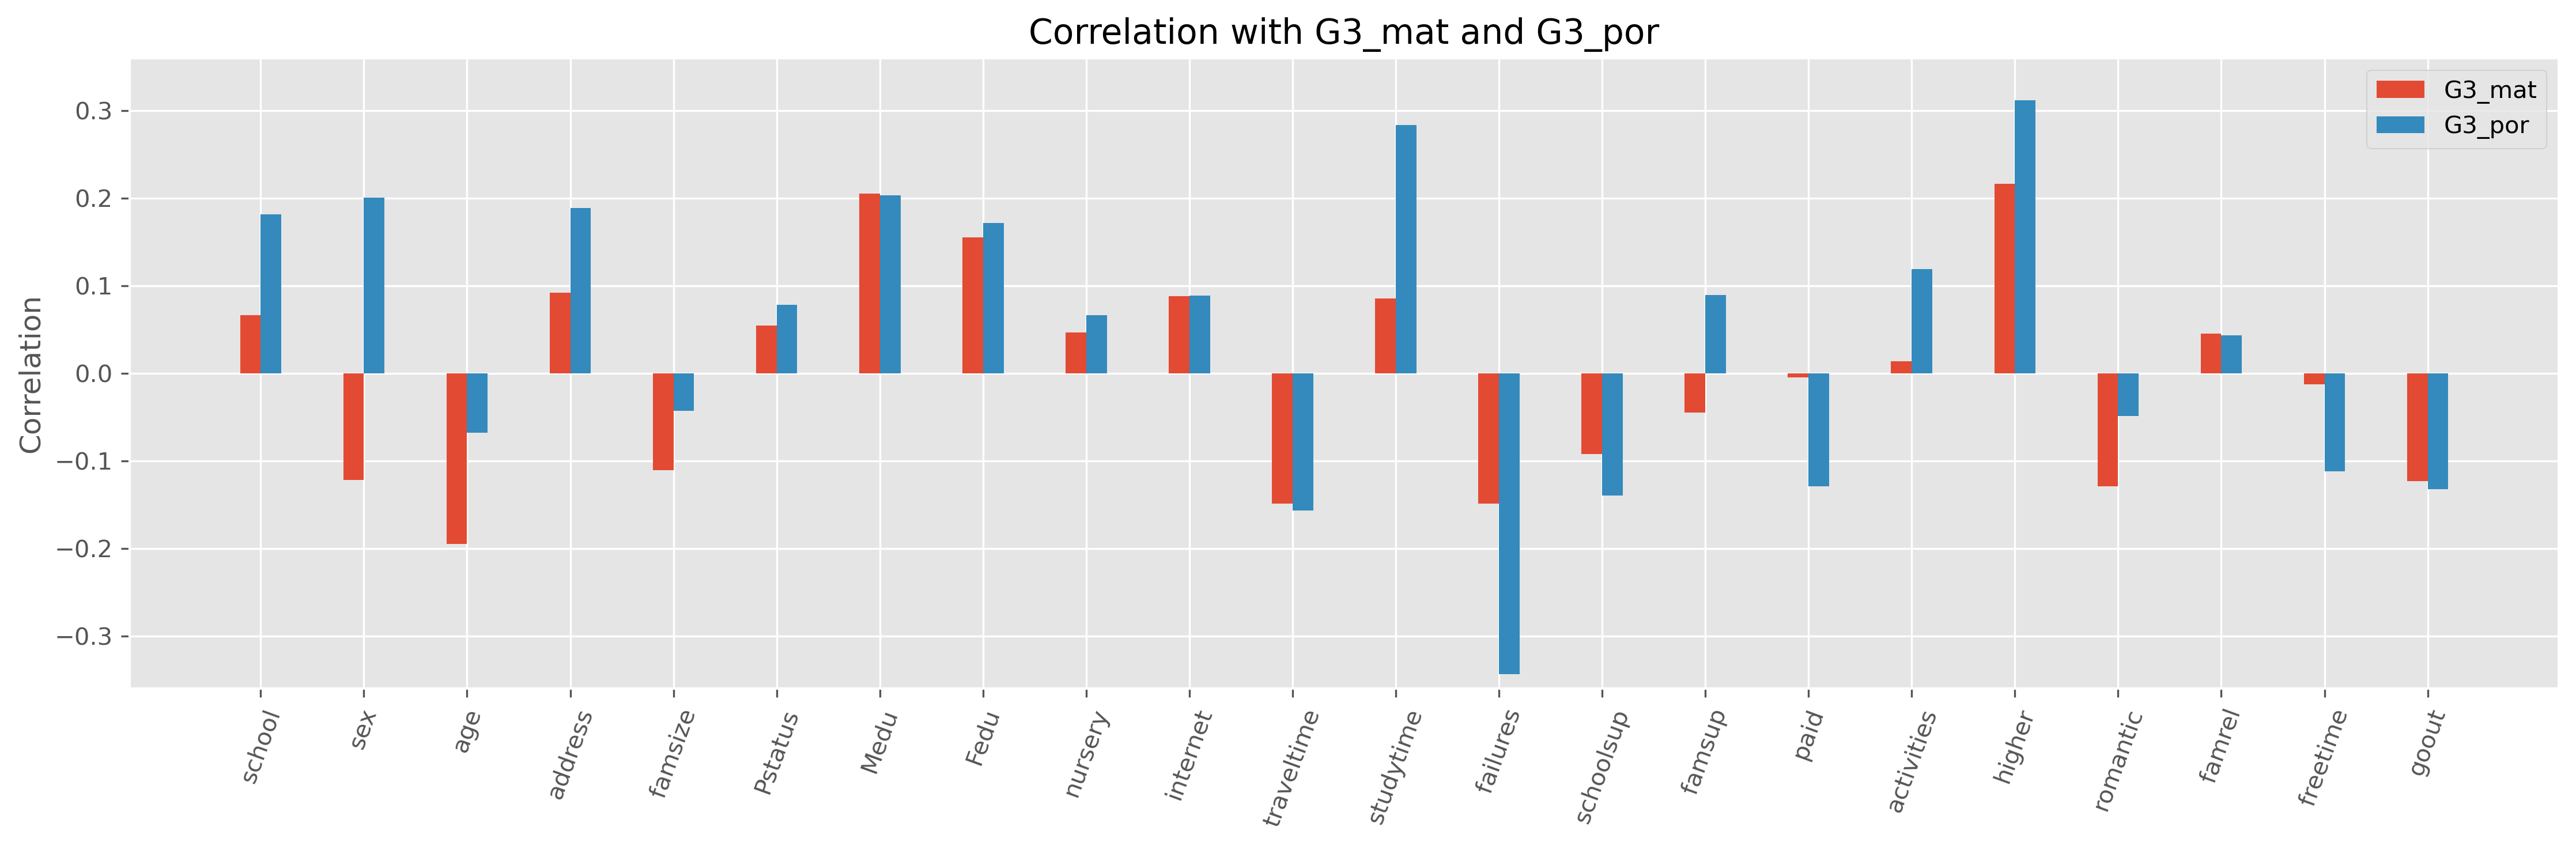

In [25]:
plot_corr(corr1, 22)

Etisk forsvarlige variabler:
- studytime, arbeidsinnsats blir en karakter
- higher, kanskje ikke, du burde ha mulighet til å ombestemme deg


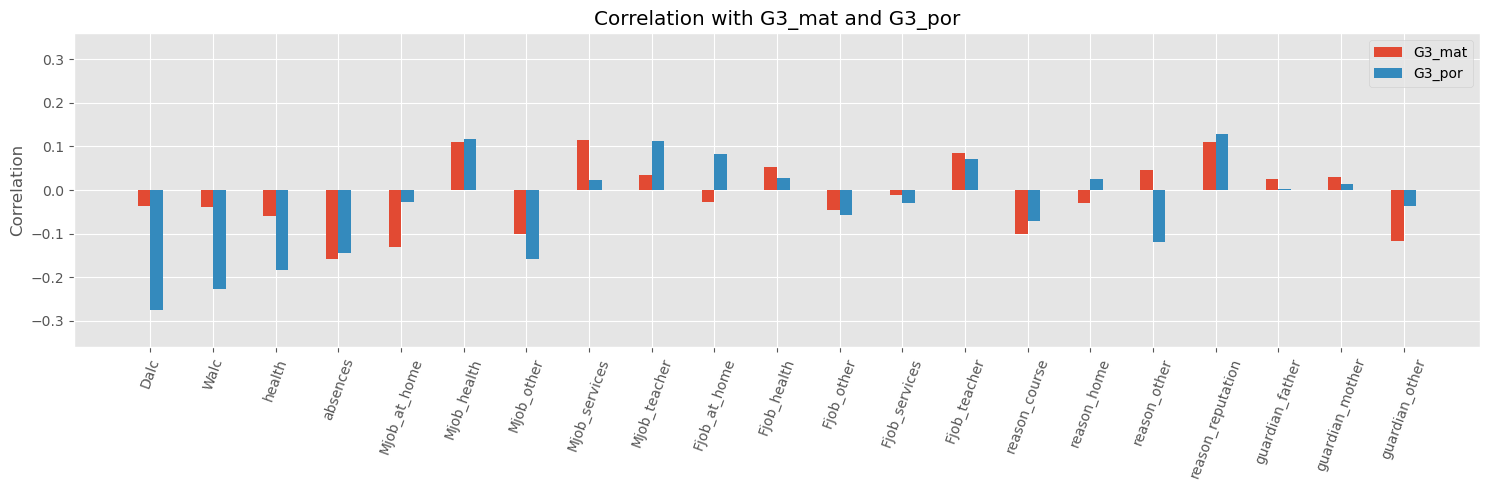

In [49]:
plot_corr(corr2, 21)

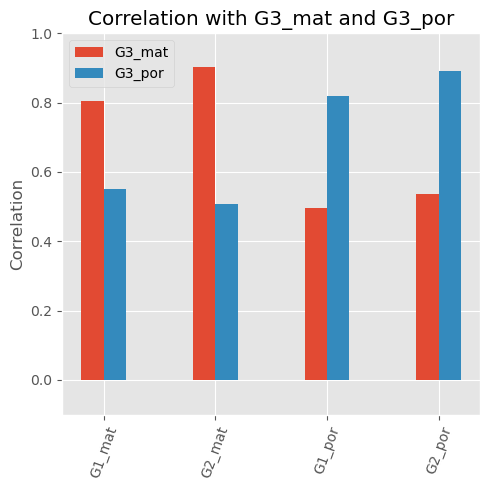

In [36]:
plot_corr(corr3, 4, y_min=-0.1, y_max=1, fig_length=5)

In [320]:
por_sort = df_numeric.G3_por.values.argsort()
G3_por = df_numeric.G3_por.values[por_sort]
G2_por = df_numeric.G2_por.values[por_sort]
G1_por = df_numeric.G1_por.values[por_sort]
Dalc = df_numeric.Dalc.values[por_sort]
G3_por, G2_por, G1_por = sort_grades(G3_por, G2_por, G1_por)

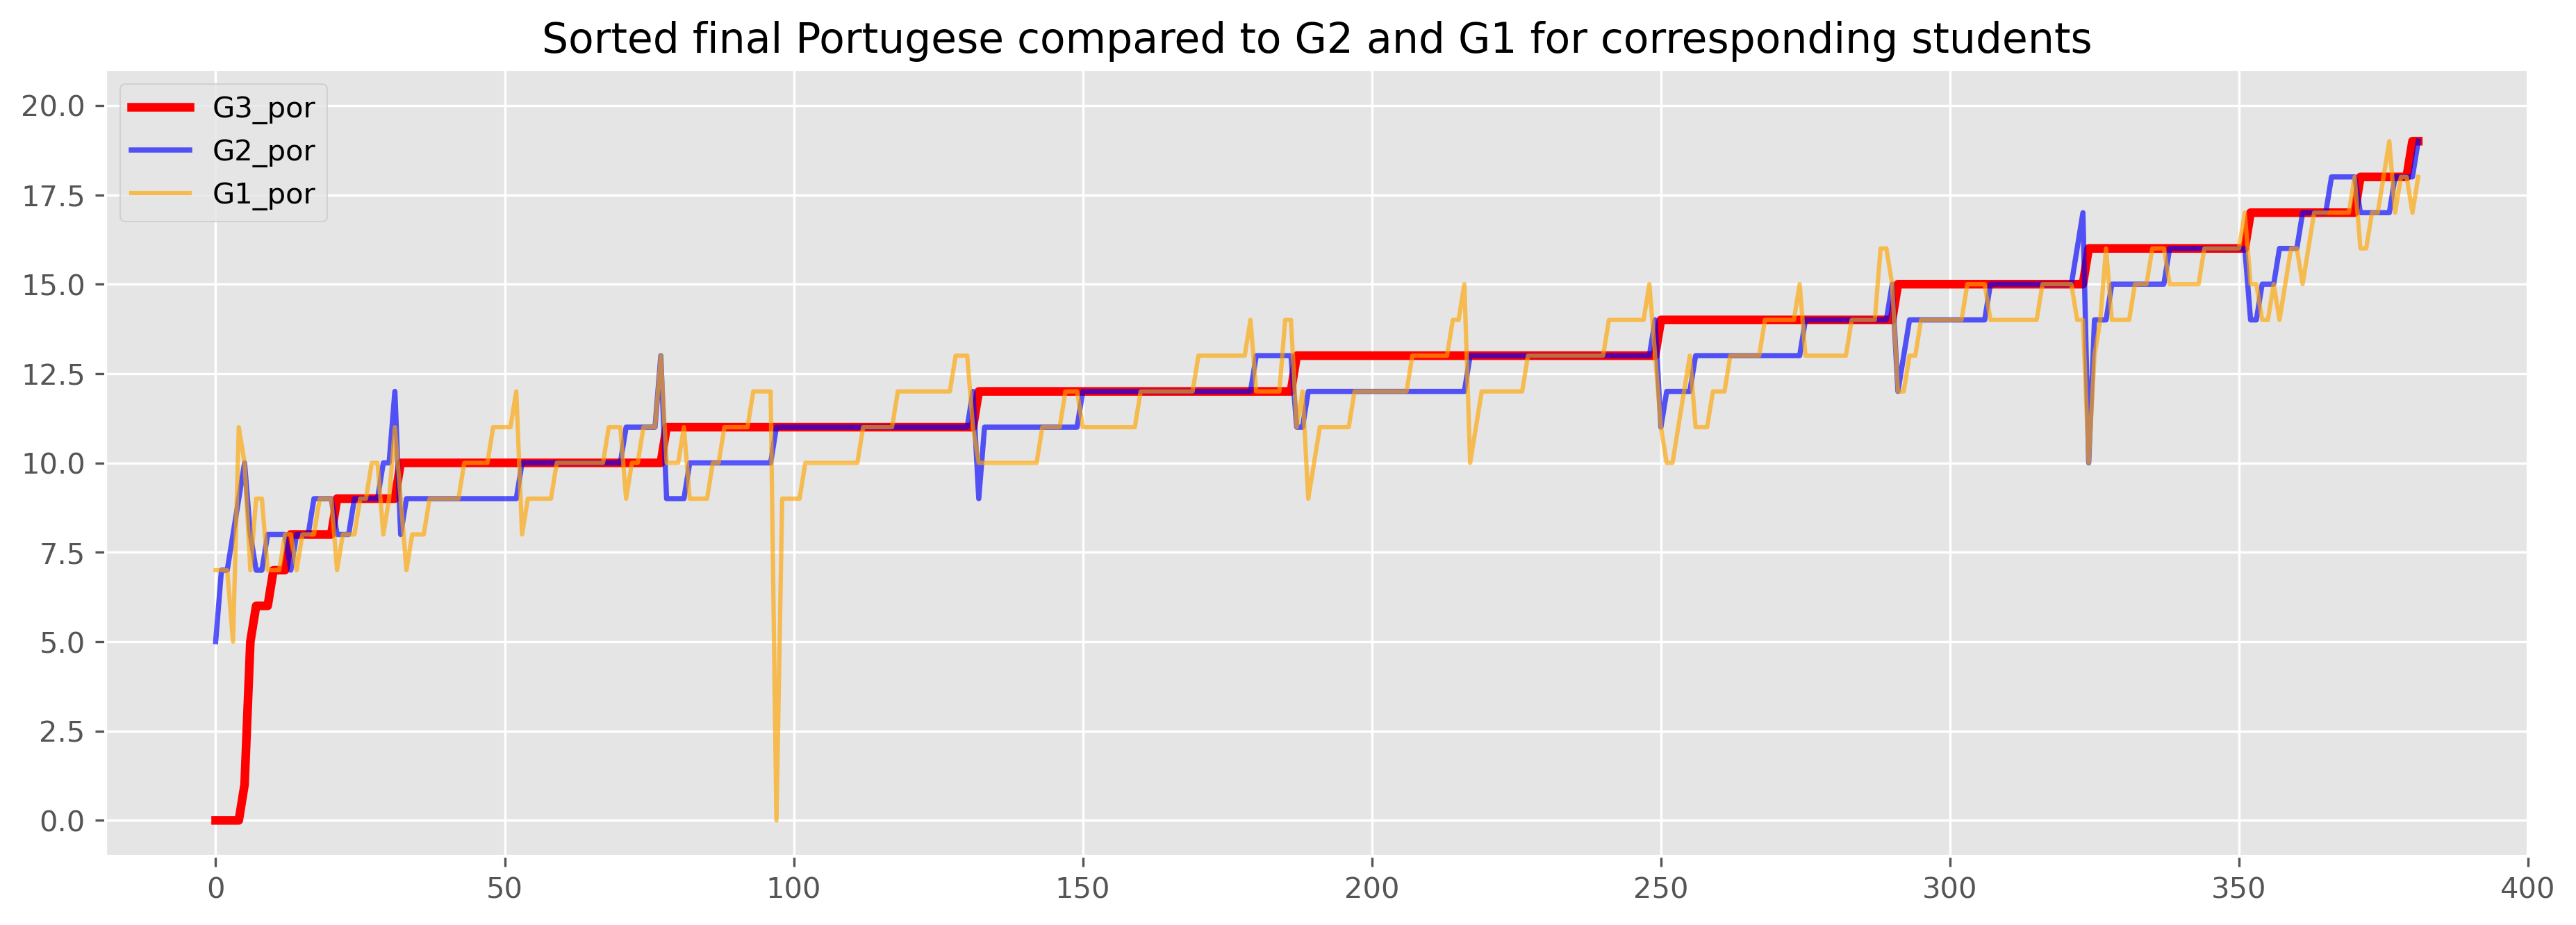

In [323]:
plt.figure(figsize=(15,5), dpi=300)
plt.plot(G3_por, label="G3_por", color="red", linewidth=3)
plt.plot(G2_por, alpha=0.65, color="blue", label="G2_por", linewidth=1.8)
plt.plot(G1_por, alpha=0.65, color="orange", label="G1_por")

plt.ylim(-1,21)
plt.title("Sorted final Portugese compared to G2 and G1 for corresponding students")
plt.legend();
plt.savefig("por_grades_comp.png", dpi=300)

In [30]:
def plot_trend(X, Y, ax):
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    ax.plot(X, p(X), "b--")

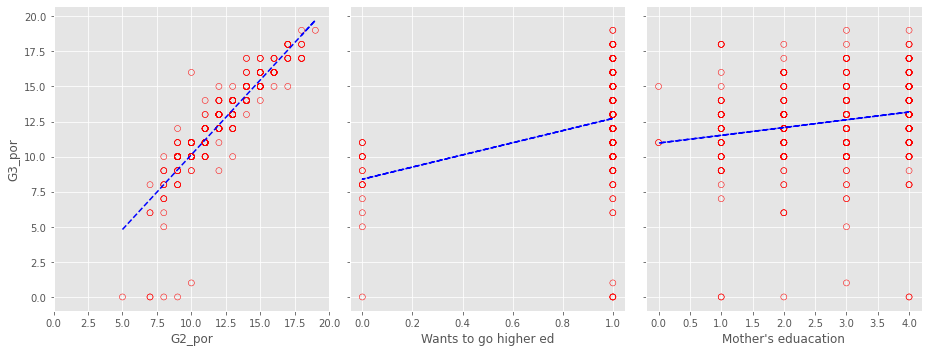

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5), sharey=True)
ax1.scatter(G2_por,G3_por, color="red", facecolors='none')
ax1.set_xlabel("G2_por")
ax1.set_ylabel("G3_por")
ax1.set_xlim(0,20)
plot_trend(G2_por, G3_por, ax1)

ax2.scatter(df_numeric.higher[por_sort], G3_por, color="red",facecolors="none")
ax2.set_xlabel("Wants to go higher ed")
plot_trend(df_numeric.higher[por_sort], G3_por, ax2)
ax3.scatter(df_numeric.Medu[por_sort], G3_por, color="red",facecolors="none")
ax3.set_xlabel("Mother's eduacation")
plot_trend(df_numeric.Medu[por_sort], G3_por, ax3)
plt.tight_layout()

In [322]:
mat_sort = df_numeric.G3_mat.values.argsort()
G3_mat = df_numeric.G3_mat.values[mat_sort]
G2_mat = df_numeric.G2_mat.values[mat_sort]
G1_mat = df_numeric.G1_mat.values[mat_sort]
G3_mat, G2_mat, G1_mat = sort_grades(G3_mat, G2_mat, G1_mat)

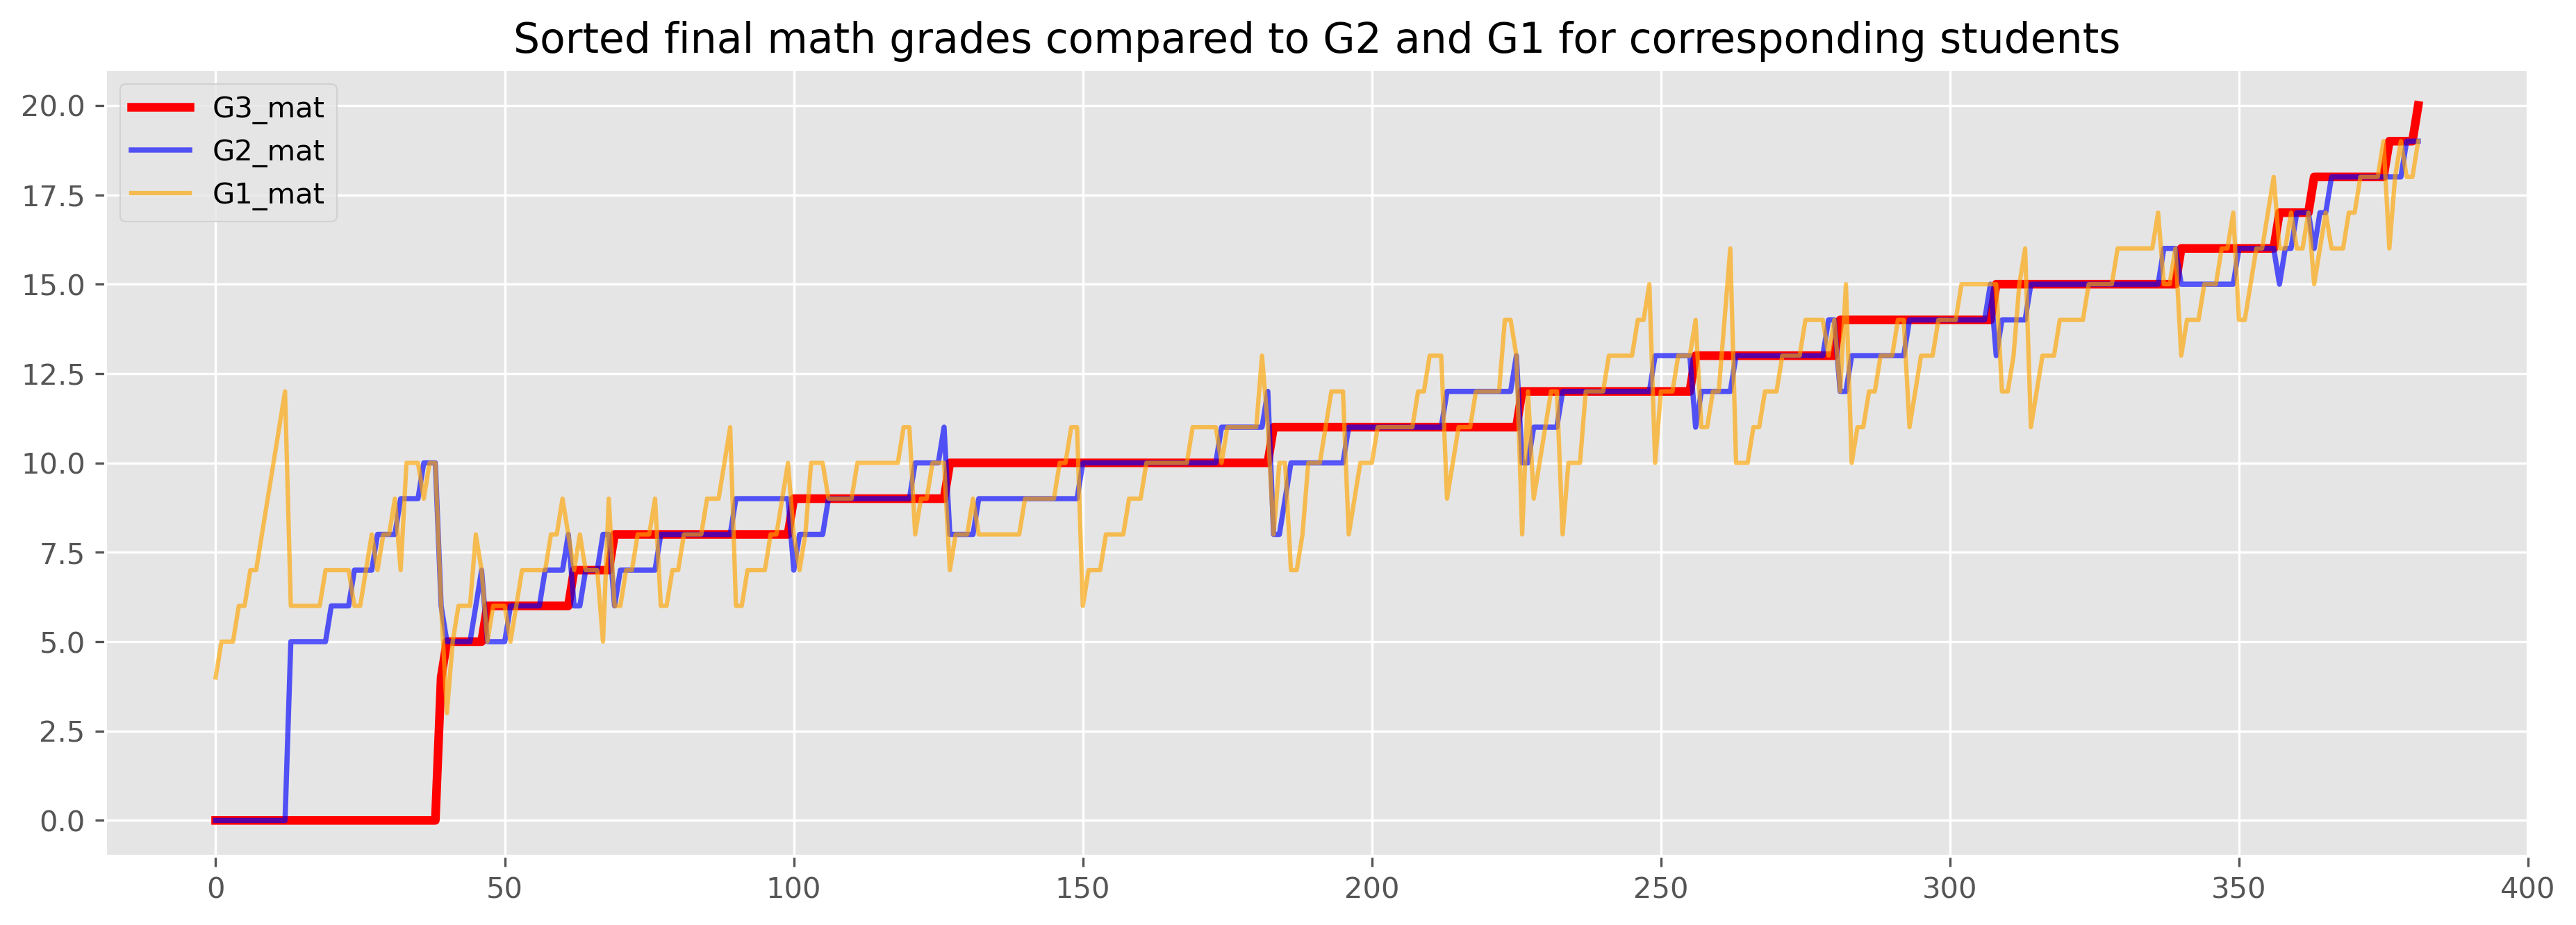

In [324]:
plt.figure(figsize=(15,5), dpi=300)
plt.plot(G3_mat, label="G3_mat", color="red", linewidth=3)
plt.plot(G2_mat, alpha=0.65, color="blue", label="G2_mat", linewidth=1.8)
plt.plot(G1_mat, alpha=0.65, color="orange", label="G1_mat")
plt.ylim(-1,21)
plt.title("Sorted final math grades compared to G2 and G1 for corresponding students")
plt.legend();
plt.savefig("mat_grades_comp.png", dpi=300)